# Sentiment Analysis of Coursera Reviews Using Logistic Regression and TF-IDF Vectorization:

Create Dataset

In [ ]:
import pandas as pd
import numpy as np

# Define the column names
column_names = ["review", "rating", "course_id", "course_name", "instructor_name", "difficulty_level", "sentiment"]

# Define the possible values for each column
review_values = ["This course was amazing!", "The instructor was very knowledgeable", "I loved the interactive quizzes", "The course was too easy", "The instructor was very responsive", "I didn't like the way the course was paced", "The course was very well-organized", "I was disappointed with the lack of hands-on exercises", "The course was perfect for beginners", "The instructor was not very engaging"]
rating_values = [1, 2, 3, 4, 5]
course_id_values = ["ML-101", "CS-202", "STAT-303", "ECON-404", "PHIL-505"]
course_name_values = ["Introduction to Machine Learning", "Data Structures and Algorithms", "Statistics for Data Science", "Economics for Business", "Philosophy of Artificial Intelligence"]
instructor_name_values = ["Dr. John Smith", "Dr. Jane Doe", "Dr. Bob Johnson", "Dr. Alice Brown", "Dr. Mike Davis"]
difficulty_level_values = ["Easy", "Medium", "Hard"]

# Create a list to store the data
data = []

# Generate 1600 random rows
for i in range(1600):
    review = np.random.choice(review_values)
    rating = np.random.choice(rating_values)
    course_id = np.random.choice(course_id_values)
    course_name = np.random.choice(course_name_values)
    instructor_name = np.random.choice(instructor_name_values)
    difficulty_level = np.random.choice(difficulty_level_values)
    sentiment = "Positive" if rating >= 4 else "Negative"
    data.append([review, rating, course_id, course_name, instructor_name, difficulty_level, sentiment])

# Create a Pandas dataframe from the data
df = pd.DataFrame(data, columns=column_names)

# Save the dataframe to a CSV file
df.to_csv("coursera_reviews.csv", index=False)

In [ ]:
print(df.head())

                                       review  rating course_id  \
0        The course was perfect for beginners       3  PHIL-505   
1  I didn't like the way the course was paced       3    ML-101   
2                     The course was too easy       5    ML-101   
3  I didn't like the way the course was paced       5  ECON-404   
4                     The course was too easy       2    ML-101   

                        course_name  instructor_name difficulty_level  \
0       Statistics for Data Science   Dr. Mike Davis             Easy   
1  Introduction to Machine Learning  Dr. Bob Johnson           Medium   
2    Data Structures and Algorithms  Dr. Alice Brown             Hard   
3       Statistics for Data Science  Dr. Bob Johnson           Medium   
4  Introduction to Machine Learning  Dr. Alice Brown             Hard   

  sentiment  
0  Negative  
1  Negative  
2  Positive  
3  Positive  
4  Negative  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            1600 non-null   object
 1   rating            1600 non-null   int64 
 2   course_id         1600 non-null   object
 3   course_name       1600 non-null   object
 4   instructor_name   1600 non-null   object
 5   difficulty_level  1600 non-null   object
 6   sentiment         1600 non-null   object
dtypes: int64(1), object(6)
memory usage: 87.6+ KB
None




This script conducts sentiment analysis on Coursera reviews, transforming text data into numerical features using TF-IDF. It trains a logistic regression model, evaluates its performance, and applies hyperparameter tuning to enhance accuracy, ultimately identifying the best model for sentiment prediction.








In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# 1. Load and Explore the Dataset
data_path = 'coursera_reviews.csv' # Change the path to the current working directory
df = pd.read_csv(data_path)

# Inspect the data, check for 'sentiment' column
print(df.head())
print(df.columns) # Print the column names to verify if 'Sentiment' exists

# 2. Preprocess the Text Data
# Assuming the dataset has 'review' and 'sentiment' columns

# Convert sentiments to binary if needed (positive = 1, negative = 0)
# Make sure 'sentiment' column exists and the keys match the values in your dataframe
if 'sentiment' in df.columns:
    df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})
else:
    print("Warning: 'sentiment' column not found in the DataFrame.")

# Drop missing values
# Make sure the column names in subset match the column names in your dataframe
df.dropna(subset=['review', 'sentiment'], inplace=True)

# 3. Split the Data
X = df['review'] # Make sure the column names match the column names in your dataframe
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a Pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('model', LogisticRegression(max_iter=1000))
])

# 5. Train the Model
pipeline.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = pipeline.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Hyperparameter Tuning
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'model__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Re-evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Print metrics
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

                                       review  rating course_id  \
0        The course was perfect for beginners       3  PHIL-505   
1  I didn't like the way the course was paced       3    ML-101   
2                     The course was too easy       5    ML-101   
3  I didn't like the way the course was paced       5  ECON-404   
4                     The course was too easy       2    ML-101   

                        course_name  instructor_name difficulty_level  \
0       Statistics for Data Science   Dr. Mike Davis             Easy   
1  Introduction to Machine Learning  Dr. Bob Johnson           Medium   
2    Data Structures and Algorithms  Dr. Alice Brown             Hard   
3       Statistics for Data Science  Dr. Bob Johnson           Medium   
4  Introduction to Machine Learning  Dr. Alice Brown             Hard   

  sentiment  
0  Negative  
1  Negative  
2  Positive  
3  Positive  
4  Negative  
Index(['review', 'rating', 'course_id', 'course_name', 'instructor_name',


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters: {'model__C': 0.1, 'tfidf__ngram_range': (1, 1)}
Best Model Accuracy: 0.63125
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       202
           1       0.00      0.00      0.00       118

    accuracy                           0.63       320
   macro avg       0.32      0.50      0.39       320
weighted avg       0.40      0.63      0.49       320

Best Model Confusion Matrix:
 [[202   0]
 [118   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Preprocesses sentiment data by mapping positive and negative sentiments to binary values. It then visualizes the sentiment distribution in Coursera reviews with a count plot for better insights.

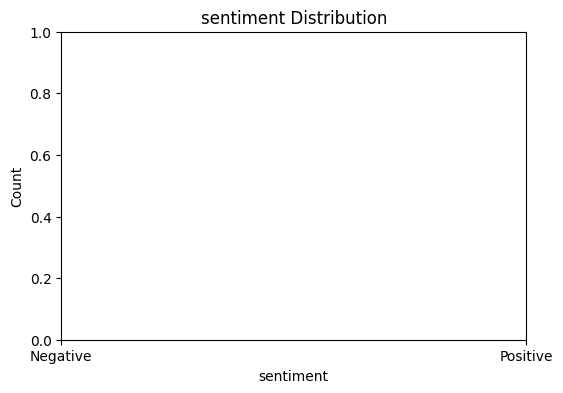

In [ ]:
# Preprocess the Text Data
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.dropna(subset=['review', 'sentiment'], inplace=True)

# Visualize the distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

Calculates and visualizes the confusion matrix for the sentiment analysis model, displaying the results with a heatmap to compare predicted versus actual sentiments in Coursera reviews.

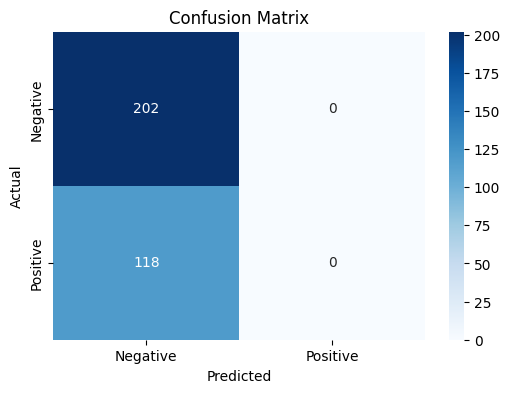

In [ ]:
# Calculate and store the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best) # Calculate confusion matrix and store it

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()